# RANDOM FOREST CLASSIFIER (BAGGING)
Multiple Decision trees will be created in parallel and majority vote will be considered

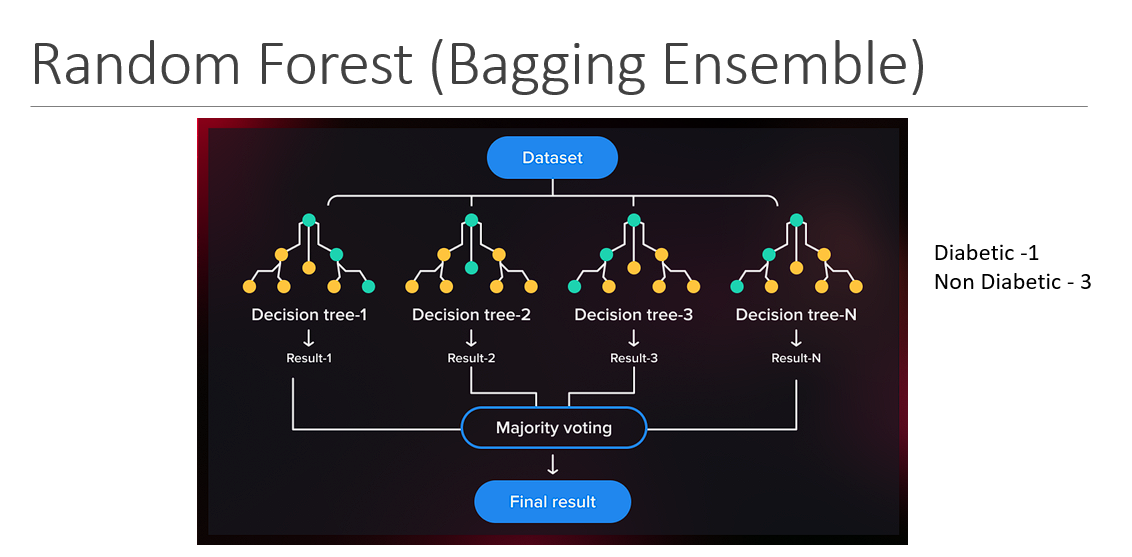

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd

### Step 1:Read Data

In [5]:
df=pd.read_csv('train_titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2 :Basic Data Quality

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
m=df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### STep 3:Seprate X And Y

In [11]:
X=df.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])

In [12]:
Y=df[['Survived']]

### Step 4: Create Preprocessing Pipeline for X

In [13]:
#cat and con
cat=list(X.columns[X.dtypes==object])
con=list(X.columns[X.dtypes!=object])



In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


In [17]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')


In [18]:

X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


### Step 5: Apply Train Test Split


In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [20]:

xtrain.shape

(712, 10)

In [21]:

xtest.shape

(179, 10)

### Step 6: Model Building and Evaluation

In [22]:

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,
                                max_depth=1,
                                min_samples_split=5,
                                min_samples_leaf=5,
                                criterion='entropy')
model1.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

In [23]:

model1.score(xtrain, ytrain)

0.6853932584269663

In [24]:

model1.score(xtest, ytest)

0.6703910614525139

### Hyperparameter tuning for RandomForest


In [25]:
params = {'n_estimators':[10, 50, 100, 200, 300],
          'max_depth':[1, 2, 3, 4, 5, 6],
          'min_samples_split':[2, 3, 4, 5, 6],
          'criterion':['gini', 'entropy']}


In [26]:

from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [27]:
rscv1.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'max_depth': 5,
 'criterion': 'entropy'}

In [28]:

rscv1.best_score_

0.8034995814988914

In [29]:

best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=4,
                       n_estimators=50)

### Predict results for train and test

In [30]:

ypred_train1 = best_rfc.predict(xtrain)
ypred_test1 = best_rfc.predict(xtest)

### Plot the confusion matrix for test

In [31]:

best_rfc.classes_

array([0, 1], dtype=int64)

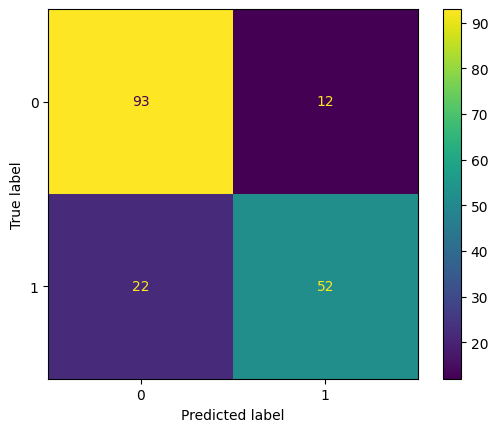

In [32]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test1)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

In [33]:

from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# Create Model 2- Gradient Boosting Model

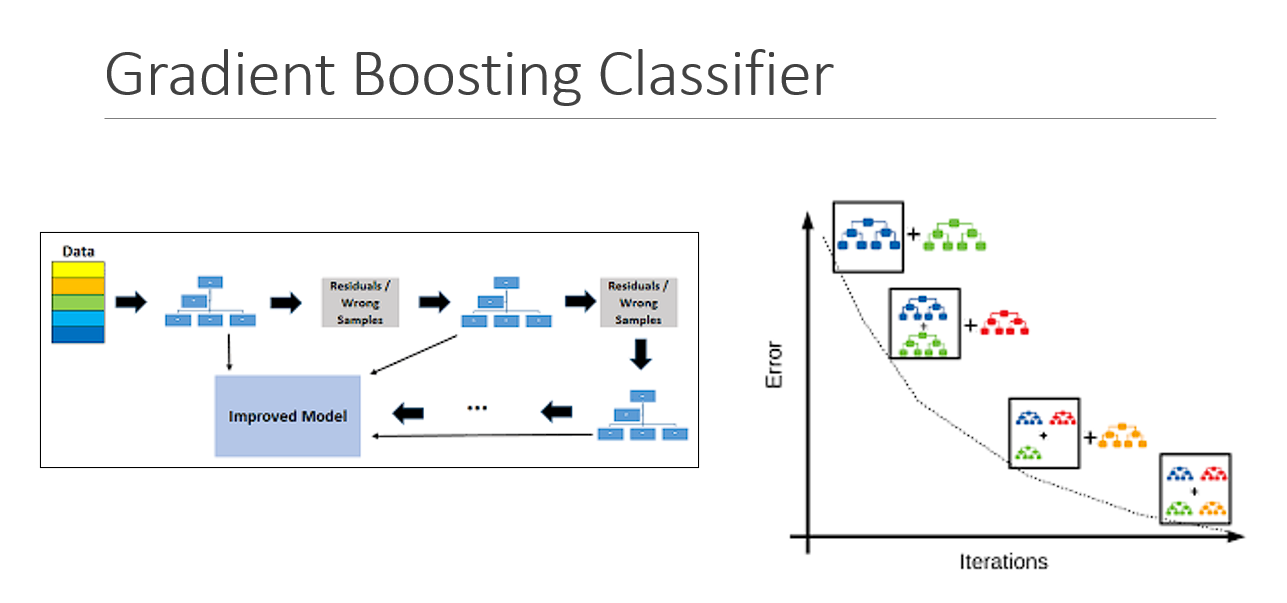

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(n_estimators=1,
                                    learning_rate=0.3,
                                    max_depth=1,
                                    min_samples_split=5,
                                    min_samples_leaf=5)
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.3, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [35]:

model2.score(xtrain, ytrain)

0.6235955056179775

In [36]:

model2.score(xtest, ytest)

0.5865921787709497

#### Hyperparameter Tuning of Gradient boost

In [37]:

params2 = {'n_estimators':[10, 50, 100, 200, 300],
           'learning_rate':[0.01, 0.1, 0.15, 0.2],
           'max_depth':[1, 2, 3, 4, 5, 6],
           'min_samples_split':[2, 3, 4, 5, 6, 7]}

In [38]:

params2 = {'n_estimators':[10, 50, 100, 200, 300],
           'learning_rate':[0.01, 0.1, 0.15, 0.2],
           'max_depth':[1, 2, 3, 4, 5, 6],
           'min_samples_split':[2, 3, 4, 5, 6, 7]}

In [39]:

gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=params2, cv=5, scoring='f1_macro')
rscv2.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [40]:

rscv2.best_params_

{'n_estimators': 50,
 'min_samples_split': 3,
 'max_depth': 2,
 'learning_rate': 0.15}

In [41]:

rscv2.best_score_

0.8041929210756418

In [42]:

best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.15, max_depth=2, min_samples_split=3,
                           n_estimators=50)

In [43]:

best_gbc.score(xtrain, ytrain)

0.8595505617977528

In [44]:

best_gbc.score(xtest, ytest)

0.8212290502793296

## Predict results for train and test

In [45]:

ypred_train2 = best_gbc.predict(xtrain)
ypred_test2 = best_gbc.predict(xtest)

In [46]:

ypred_train2[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [47]:

ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [48]:

ypred_test2[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [49]:

ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


#### Plot confusion matrix for Gradient Boost

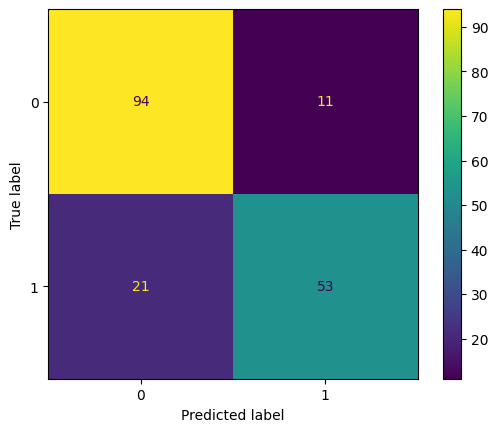

In [50]:

cf2 = confusion_matrix(ytest, ypred_test2)
cfd2 = ConfusionMatrixDisplay(cf2, display_labels=best_gbc.classes_)
cfd2.plot()

In [51]:

print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179




Gradient Boosting Model is slightly better Than Random Forest for given dataset
Test

Gradient Boosting - 81%

Random Forest - 80%

### Step 8: out of sample prediction

In [52]:

xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:

xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


In [54]:

preds = best_gbc.predict(xnew_pre)
probs = best_gbc.predict_proba(xnew_pre)

In [55]:

preds

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:

best_gbc.classes_

array([0, 1], dtype=int64)

In [57]:

probs[0:5]

array([[0.85426621, 0.14573379],
       [0.28604699, 0.71395301],
       [0.8506675 , 0.1493325 ],
       [0.86792053, 0.13207947],
       [0.51833624, 0.48166376]])

In [58]:

prob_surv = probs[:,1]
prob_surv[0:5]

array([0.14573379, 0.71395301, 0.1493325 , 0.13207947, 0.48166376])

In [59]:
df_results = xnew[['PassengerId']]
df_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [60]:

df_results['Survived_pred'] = preds 
df_results['Probability'] = prob_surv

In [61]:

df_results['Survived_pred'].value_counts()

Survived_pred
0    287
1    131
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

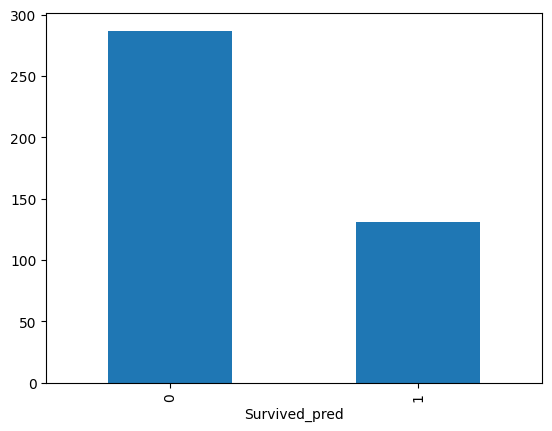

In [62]:

df_results['Survived_pred'].value_counts().plot(kind='bar')

In [63]:
df_results.to_csv('Results.csv', index=False)


### Feature importances

In [64]:

imp = best_gbc.feature_importances_
imp

array([0.184393  , 0.11614102, 0.03328974, 0.0119073 , 0.07367377,
       0.21075358, 0.35697447, 0.0024728 , 0.        , 0.01039433])

In [65]:

xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [66]:

imp = pd.Series(imp)
imp.index = xtrain.columns

<Axes: >

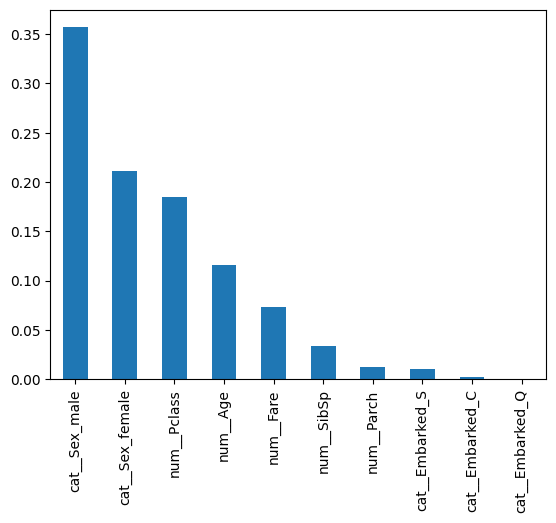

In [67]:

imp.sort_values(ascending=False)

imp.sort_values(ascending=False).plot(kind='bar')

In [68]:
# For Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor